# Newton Integration Root Finding

In [137]:
import numpy as np
from scipy.optimize import newton
from polyrand import rootfinder as rf
import matplotlib.pyplot as plt
import importlib
from matplotlib import animation,rc
from IPython.display import HTML
%matplotlib inline

In [138]:
importlib.reload(rf)

<module 'polyrand.rootfinder' from '/Users/derekmiller/Desktop/D_stuff/polyrand/polyrand/rootfinder.py'>

### Fractional Antiderivative

$\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k+a} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1+a} + \cdots + c_0 x^a + C$

$x^a (\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1} + \cdots + c_0 x + C)$

$x^a (\sum_{i=0}^{k} \frac{\Gamma(k-i)}{\Gamma(k-i+a)} c_{k-i} x^{k-i} + C)$

Let $G_{k,a} = \frac{\Gamma(k)}{\Gamma(k+a)}$, then 

$x^a (\sum_{i=0}^{k} G_{k-i,a} c_{k-i} x^{k-i} + C)$

**Newton Integration**

1) Get coefficients of the polynomial to be solved.

2) Differentiate down to a polynomial $d^np$ whose roots are known.

3) Find the fractional antiderivative $d^{n+a}p$ where $a \in (0,1]$.

4) Find the roots of $d^{n+a}p$ using newton's method with the roots of $d^np$ as the guess.

5) Update roots by repeating steps 3 and 4.

**Complexity Analysis**

computational complexity

$ c = count(k-a>0)$

gamma eval is constant

QR is $4/3 c^3$

$ c = count(k-a>0)$



In [262]:
def newton_integration_x(coeffs,dx,n=5,show=False):
    """
    NIRF (Newton Integration Root Finding)
    Use newton's method to integrate the roots of a polynomial up to a different polynomial.
    
    """
    # define the partition of fractional differentiation terms
    a = np.linspace(0,dx,n+1)
    
    # plot the solution we hope to get to
    if show:
        plt.figure(figsize=(8,8))
    R = np.polynomial.polynomial.Polynomial(coeffs).roots()
    if show:
        plt.scatter(R.real,R.imag,color='k',alpha=.2,s=150)

    # Find known roots of a derivative
    D = rf.frac_deriv(coeffs,dx)
    R_ = np.linalg.eig(D)[0]
    Roots = R_[R_.imag >= 0].copy()
    if show:
        #print(Roots[Roots.imag >= 0])
        plt.scatter(Roots.real,Roots.imag,color='k',label="Derivative Roots")
    
    step = 0
    
    
    for i in range(n+1):

        # define the function to optimize
        F_coeffs = rf.frac_deriv(coeffs,dx-a[i],return_coeffs=True)
        P = np.polynomial.polynomial.Polynomial(F_coeffs)
        
        # determines whether to add a new root at zero(ish)
        add_one = (step < np.floor(a[i])) & (a[i] != a[-1])
        
        if add_one:
            Z = [-.01 + 0.j]
            step = np.floor(a[i])
        else:
            Z = []

        # Newton's method to find roots of function to optimize
        for r in Roots: # these are roots of P0
            
            # ignore negative complex region to save on flops
            
            f = lambda x: P(x)/x**(a[i])
                
            z = newton(f,r)
            # is this necessary?
            if z.imag < 0:
                Z.append(np.conjugate(z))
            else:
                Z.append(z)
            if show:
                plt.scatter(Z[-1].real,Z[-1].imag,color='orange',alpha=.2)

        Roots = np.array(Z)
        
    if show:
        plt.scatter(Roots.real,Roots.imag,color='r',alpha=.5)
        Roots_ = np.conjugate(Roots)
        #plt.scatter(Roots_.real, Roots_.imag,color='k',alpha=.5)
        plt.axis('equal')
        plt.legend()
        plt.show()
        
    return Roots

RuntimeError: Failed to converge after 50 iterations, value is (-0.199222227977+0.00866700687379j)

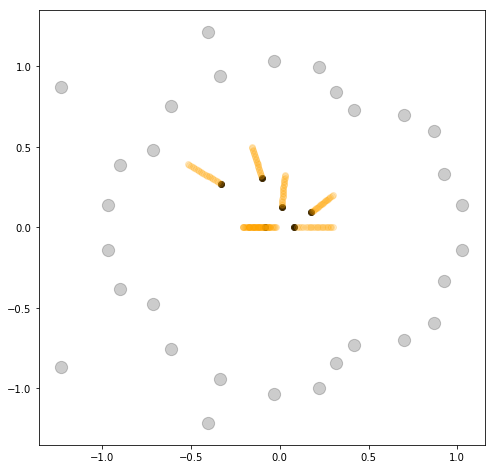

In [285]:
# test case
np.random.seed(0)
coeffs = np.random.randn(31)
coeffs[-1] = 1.

newton_integration_x(coeffs,20,n=100,show=True)
#rf.timelapse(coeffs,0,3,n_frames=15)

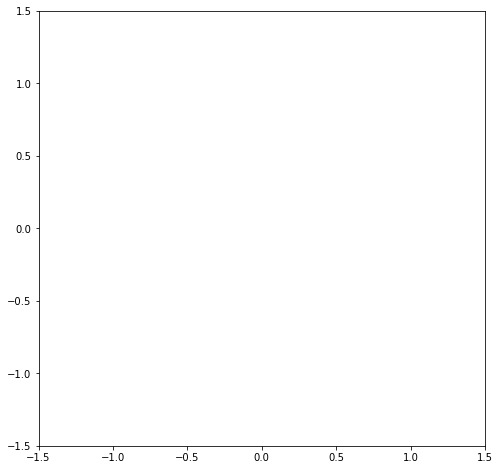

In [240]:
rf.animate_roots(coeffs,0,3)

Thoughts:

+ Theorem stating how roots combine on the real axis. This makes it easier to newton integrate.
+ Theorem: The initial guess for the roots of a function can be brought within the Newton-Kantorovich bound via the roots of a fractional derivative.

array([ 0.        ,  0.00502513,  0.01005025,  0.01507538,  0.0201005 ,
        0.02512563,  0.03015075,  0.03517588,  0.04020101,  0.04522613,
        0.05025126,  0.05527638,  0.06030151,  0.06532663,  0.07035176,
        0.07537688,  0.08040201,  0.08542714,  0.09045226,  0.09547739,
        0.10050251,  0.10552764,  0.11055276,  0.11557789,  0.12060302,
        0.12562814,  0.13065327,  0.13567839,  0.14070352,  0.14572864,
        0.15075377,  0.15577889,  0.16080402,  0.16582915,  0.17085427,
        0.1758794 ,  0.18090452,  0.18592965,  0.19095477,  0.1959799 ,
        0.20100503,  0.20603015,  0.21105528,  0.2160804 ,  0.22110553,
        0.22613065,  0.23115578,  0.2361809 ,  0.24120603,  0.24623116,
        0.25125628,  0.25628141,  0.26130653,  0.26633166,  0.27135678,
        0.27638191,  0.28140704,  0.28643216,  0.29145729,  0.29648241,
        0.30150754,  0.30653266,  0.31155779,  0.31658291,  0.32160804,
        0.32663317,  0.33165829,  0.33668342,  0.34170854,  0.34